# SQL-запросы

### Задача:

* Провести анализ базы данных
* Выполнить запросы

In [1]:
import pandas as pd
from sqlalchemy import create_engine 

db_config = {'user': 'praktikum_student',
             'pwd': 'Sdf4$2;d-d30pp',
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net', 
             'port': 6432,
             'db': 'data-analyst-final-project-db'}
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                         db_config['pwd'],
                                                         db_config['host'],
                                                         db_config['port'],
                                                         db_config['db']) 

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

### Анализируем данные

In [2]:
for table in ['books', 'authors', 'publishers', 'ratings', 'reviews']:
    query = ''' SELECT * FROM {}; 
    '''.format(table) 

    request = pd.io.sql.read_sql(query, con = engine)
    print(f"Таблица: {table}")
    display(request.head())
    request.info()
    print(f"Количество дубликатов в датафрейме: {request.duplicated().sum()}")
    print('****************************************************************************************************')

Таблица: books


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB
Количество дубликатов в датафрейме: 0
****************************************************************************************************
Таблица: authors


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB
Количество дубликатов в датафрейме: 0
****************************************************************************************************
Таблица: publishers


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB
Количество дубликатов в датафрейме: 0
****************************************************************************************************
Таблица: ratings


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB
Количество дубликатов в датафрейме: 0
****************************************************************************************************
Таблица: reviews


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB
Количество дубликатов в датафрейме: 0
****************************************************************************************************


Пропусков и дубликатов нет

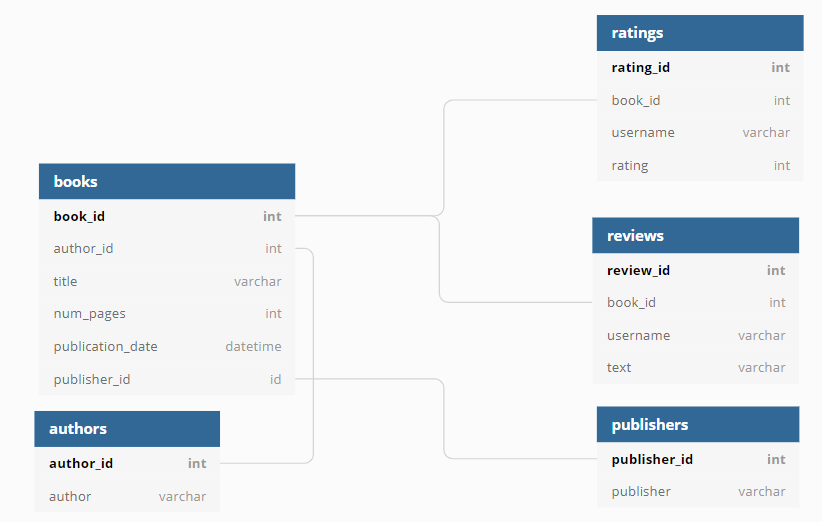

### Посчитайте, сколько книг вышло после 1 января 2000 года

In [3]:
query = ''' 
SELECT 
      COUNT(*) 
FROM books
WHERE publication_date > '2000-1-1'; 
''' 
pd.io.sql.read_sql(query, con = engine)

,count
0,819


### Вывод:

После 1 января 2000 года вышло 819 книг

### Для каждой книги посчитайте количество обзоров и среднюю оценку

In [4]:
query = ''' 
SELECT books.book_id,
       books.title,
       rat.avg_rating,
       rev.review_count
FROM books
LEFT JOIN (SELECT book_id, AVG(rating) AS avg_rating FROM ratings GROUP BY book_id) AS rat ON books.book_id=rat.book_id
LEFT JOIN (SELECT book_id, COUNT(*) AS review_count FROM reviews GROUP BY book_id) AS rev ON books.book_id=rev.book_id; 
''' 
pd.io.sql.read_sql(query, con = engine)

,book_id,title,avg_rating,review_count
0,652,The Body in the Library (Miss Marple #3),4.500000,2.0
1,273,Galápagos,4.500000,2.0
2,51,A Tree Grows in Brooklyn,4.250000,5.0
3,951,Undaunted Courage: The Pioneering First Missio...,4.000000,2.0
4,839,The Prophet,4.285714,4.0
...,...,...,...,...
995,64,Alice in Wonderland,4.230769,4.0
996,55,A Woman of Substance (Emma Harte Saga #1),5.000000,2.0
997,148,Christine,3.428571,3.0
998,790,The Magicians' Guild (Black Magician Trilogy #1),3.500000,2.0


Количество обзоров и средние оценки представлены в таблице

### Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры

In [5]:
query = '''
SELECT 
    p.publisher
FROM books AS b
    LEFT JOIN publishers AS p ON b.publisher_id = p.publisher_id
WHERE num_pages > 50
GROUP BY b.publisher_id, p.publisher
ORDER BY COUNT(*) DESC
LIMIT 1
'''
pd.io.sql.read_sql(query, con = engine)

,publisher
0,Penguin Books


### Вывод:

Британское издательство Penguin Books

### Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [6]:
query = '''
SELECT 
    a.author
FROM (
    SELECT 
        book_id, 
        AVG(rating) AS ratings
    FROM ratings
    GROUP BY book_id
        HAVING COUNT(*) > 50
    ) AS rat
JOIN (SELECT book_id, author_id FROM books) AS b ON rat.book_id=b.book_id
JOIN (SELECT author_id, author FROM authors) AS a ON b.author_id=a.author_id
GROUP BY a.author
ORDER BY avg(ratings) DESC
LIMIT 1            
'''
pd.io.sql.read_sql(query, con = engine)

,author
0,J.K. Rowling/Mary GrandPré


### Вывод:

Писательница Джоан Роулинг. Автор книг про Гарри Поттера.

### Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [7]:
query = ''' 

SELECT
    AVG(sub.n_reviews)
FROM
    (SELECT username,
    COUNT(review_id) AS n_reviews
    FROM
        reviews
    WHERE 
        username IN (
                SELECT 
                    username
                FROM 
                    ratings
                GROUP BY 
                    username
                HAVING 
                    COUNT(rating_id) > 50
                    )
    GROUP BY username
    ) AS sub
; ''' 

pd.io.sql.read_sql(query, con = engine)

,avg
0,24.333333


### Вывод:

среднее количество обзоров от пользователей, которые поставили больше 50 оценок составляет 24,3